# Exemplo Loja GT Auto
A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos veículos disponíveis que apresente algumas informações importantes para treinar os novos vendedores. A base de dados foi criada em um documento de texto e contém as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir a velocidade de 100km/h: cemm. 
*   Número de cilindros: nu_cy.
*   Tipo de motor, aspirado (0) ou turbo (1): Etype.
 

Após ter realizado a análise dos dados apresentados, obter o modelo de regressão múltipla, escolha as variáveis adequadas.

In [2]:
#@title Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf #adicionada na semana 6
import seaborn as sns
import scipy.stats as stats #adicionada na semana 6
from scipy.stats import f #adicionada na semana 6
from statsmodels.graphics.gofplots import ProbPlot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#@title Upload da base de dados
from google.colab import files
uploaded = files.upload()

Saving carst7.txt to carst7.txt


In [4]:
#@title Leitura da base de dados
#Verificar se os dados foram importados
print (uploaded['carst7.txt'][:200].decode('utf-8') + '...')

brand_model_year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
Gurgel BR800 0.8 1991, 792, 12, 33, 650, 34.4, 2, 0
FIAT UNO Mille EP 1996, 994, 10.4, 58, 870, 18.6, 4, 0
Hyundai HB20 Sense 2020, 10...


In [5]:
cars = pd.read_csv("carst7.txt", index_col=0)#cars = pd.read_table("carst.txt",sep="\t", header=0, index_col=0)

In [6]:
#Observar os nomes das variáveis
cars.columns

Index(['cap_vol', 'consumo', 'power', 'weight', 'cemm', 'nu_cy', 'Etype'], dtype='object')

In [7]:
#Observar o tipo de dado de cada coluna
print(cars.dtypes)

cap_vol      int64
consumo    float64
power        int64
weight       int64
cemm       float64
nu_cy        int64
Etype        int64
dtype: object


In [8]:
#Observar os índices
print(cars.index)

Index(['Gurgel BR800 0.8 1991', 'FIAT UNO Mille EP 1996',
       'Hyundai HB20 Sense 2020', 'FIAT Strada 1.4 2016',
       'VolksWagen GOL 1.6 2015', 'Chevrolet Cruze LTZ 1.8 2016',
       'Honda Civic EXR 2016', 'Ford Focus 2.0 GLX 2012', 'BMW 325i 3.0 2012',
       'AUDI A4 3.2 V6 Fsi 2011', 'Mercedes-Benz CLS 350 3.5 V6 2012',
       'Mercedes-Benz CLS 500 5.5 V8 2007', 'Chevrolet Camaro SS 6.2 V8 2018',
       'Pagani Zonda F 7.3 V12 2006', 'Volkswagen Polo Highline 1.0 Tsi 2021',
       'Chevrolet Tracker Premier 1.2 T 2021',
       'Chevrolet Cruze LTZ 1.4 T 2021', 'Honda Civic Touring 1.5 T 2021',
       'Peugeot 306 Griffe 1.6 THP 2019', 'Audi A4 Attraction 1.8 TSFi 2015',
       'BMW 320i Sport 2.0 T 2020', 'Porsche Panamera 3.0 V6 2018',
       'Honda NSX 3.5 V6 T 2017', 'Nissan GTR Nismo 3.8 V6 T 2015',
       'Mercedes-Benz E63 S AMG 4.0 V8 2021',
       'Aston Martin DB11 5.2 V12 T 2017', 'Pagani Huayra 6.0 V12 T 2014',
       'Bugatti Chiron 8.0 W16 2016'],
      dtype='o

In [9]:
# Reduzir a base de dados para usar apenas 
# o motor naturalmente aspirado
dfcars = cars.iloc[1:14,:]
dfcars.head(15)

,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
brand_model_year,,,,,,,
FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [10]:
#dimensões 
print(dfcars.shape) 
#número de instâncias 
na = dfcars.shape[0] 
# número de variáveis
pa = dfcars.shape[1] - 1

(13, 7)


In [11]:
#@title Regressão Primeira opção
#Regressão com a fórmula import statsmodels.formula.api as smf 
regmul = smf.ols('consumo ~ cap_vol + power + weight', data = dfcars) 
#Realizar o processo de modelagem
res = regmul.fit()

In [12]:
#Membros do objeto reg
print(dir(regmul))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data_attr', '_df_model', '_df_resid', '_fit_collinear', '_fit_ridge', '_fit_zeros', '_get_init_kwds', '_handle_data', '_init_keys', '_setup_score_hess', '_sqrt_lasso', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'fit', 'fit_regularized', 'formula', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'loglike', 'nobs', 'normalized_cov_params', 'pinv_wexog', 'predict', 'rank', 'score', 'weights', 'wendog', 'wexog', 'wexog_singular_values', 'whiten']


In [13]:
#Membros do objeto que o processo de modelagem forneceu
print(dir(res))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlie

In [14]:
#Resultado detalhado
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     18.17
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           0.000369
Time:                        01:37:38   Log-Likelihood:                -18.408
No. Observations:                  13   AIC:                             44.82
Df Residuals:                       9   BIC:                             47.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8973      1.640      8.475      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [15]:
#@title Cálculo do Fcrit (tabela)
import scipy.stats
F=res.fvalue
k=res.df_model # grau do modelo
n=res.nobs # num. amostras
dfn=k
dfd=n-(k+1)
alpha = 0.1 #nível de confiança.
F_critico=scipy.stats.f.ppf(1-alpha, dfn, dfd)
print("F_crit=",F_critico) #tabela F-dist

F_crit= 2.8128629971823895


In [1]:
#@title Cálculo t_crit (tabela t-student)
from scipy.stats import t
alpha = 0.1  # significia = 5% 
df = 11 # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 1.7958848187036691


In [17]:
#@title Regressão Segunda opção
regmul2 = smf.ols('consumo ~ cap_vol + power + weight + nu_cy', data = dfcars) 
#Realizar o processo de modelagem
res2 = regmul2.fit()
#Resultado detalhado
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.32e-06
Time:                        01:37:38   Log-Likelihood:                -6.5200
No. Observations:                  13   AIC:                             23.04
Df Residuals:                       8   BIC:                             25.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0213      1.437     15.329      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [18]:
#@title Regressão Terceira opção
regmul3 = smf.ols('consumo ~ power + weight + nu_cy', data = dfcars) 
#Realizar o processo de modelagem
res3 = regmul3.fit()
#Resultado detalhado
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     124.9
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.19e-07
Time:                        01:37:38   Log-Likelihood:                -6.7184
No. Observations:                  13   AIC:                             21.44
Df Residuals:                       9   BIC:                             23.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9086      1.358     16.132      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [19]:
res3.params

Intercept    21.908572
power         0.020282
weight       -0.005344
nu_cy        -2.022731
dtype: float64

In [20]:
#@title Gráficos dispersão e resíduos
#Valores previstos e residuos
y_pred=list(res3.predict())
resi=list(res3.resid)
#crear instancia influence
influence = res3.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
prop=np.divide(resi,stdresid) #e/e*

In [21]:
y=list(dfcars['consumo'])
dftab = pd.DataFrame(list(zip(y,y_pred,resi,stdresid,prop)),
               columns =["y","y_p","e","e*","e/e*"])
dftab.head(10)

,y,y_p,e,e*,e/e*
0,10.4,10.345134,0.054866,0.140443,0.390663
1,12.8,12.178190,0.621810,1.617789,0.384358
2,10.3,9.769516,0.530484,1.217066,0.435871
3,10.5,10.791847,-0.291847,-0.675226,0.432221
4,8.5,9.113044,-0.613044,-1.359483,0.450939
5,9.5,10.046835,-0.546835,-1.228797,0.445017
6,9.2,9.621654,-0.421654,-0.927807,0.454463
7,6.5,6.392115,0.107885,0.272351,0.396125
8,7.1,6.624970,0.475030,1.067406,0.445033
9,6.6,6.707464,-0.107464,-0.252444,0.425695


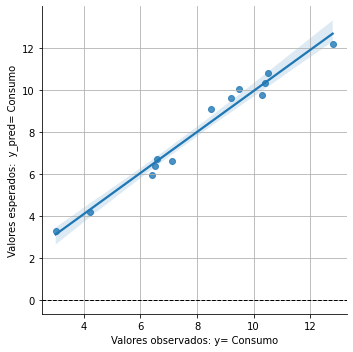

In [22]:
#@title Gráficos de diagnóstico 2 (y vs. yc)
sns.lmplot(x='y', y='y_p', data=dftab);plt.grid(True)
plt.xlabel('Valores observados: y= Consumo')
plt.ylabel('Valores esperados:  y_pred= Consumo')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

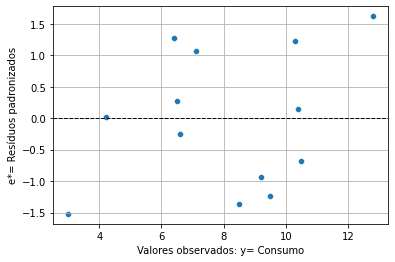

In [23]:
#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='y', y='e*', data=dftab);plt.grid(True)
plt.xlabel('Valores observados: y= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

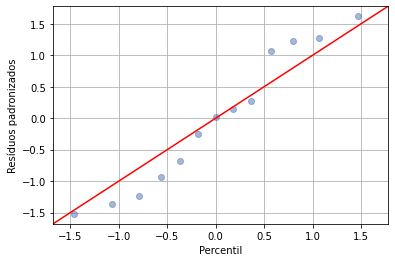

In [24]:
#@title Gráficos de diagnóstico 4
#Verificar a normalidade dos resíduos
#qqpolot vs. normal distribution 
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')
plt.grid(True)

In [25]:
#Jarque-Bera normality test import statsmodels.api as sm 
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(res3.resid) 
print(JB,JBpv,skw,kurt)

0.9356004195554889 0.6263786554878777 0.08916068550630878 1.6979002335974027


In [26]:
#Analisar amostras influentes
infl = res3.get_influence()
#leverage 
print(infl.hat_matrix_diag)

[0.35806038 0.37861409 0.20088976 0.21422029 0.14468658 0.16700463
 0.13126423 0.33998544 0.16694511 0.23776741 0.32914283 0.46714838
 0.86427087]


In [27]:
#Valores dos resíduos (influencias internas)
#residus = res3.resid.as_matrix() #residuals
leviers = infl.hat_matrix_diag #leverage
sigma_err = np.sqrt(res3.scale) #regression standard error
res_stds = stdresid/(sigma_err*np.sqrt(1.0-leviers))
print(res_stds)

[ 0.35949995  4.20906954  2.79225934 -1.5622264  -3.01478277 -2.7612392
 -2.04154318  0.68753833  2.39848859 -0.59301501  0.05304166  3.59442848
 -8.46147643]


In [28]:
#Limiar 
#threshold leverage
seuil_levier = 2*(pa+1)/na
print(seuil_levier)
#identification
atyp_levier = leviers > seuil_levier
print(atyp_levier)

1.0769230769230769
[False False False False False False False False False False False False
 False]


In [29]:
#Quais carros ultrapassam esse limiar
print(dfcars.index[atyp_levier],leviers[atyp_levier])

Index([], dtype='object', name='brand_model_year') []


In [30]:
#dimensões 
print(dfcars.shape) 
#número de instâncias 
na = dfcars.shape[0] 
# número de variáveis
pa = dfcars.shape[1] - 4
na,pa

(13, 7)


(13, 3)

In [31]:
#valores fornecidos pelo objeto
print(infl.resid_studentized_external)
#verificando com a fórmula
res_studs = res_stds*np.sqrt((na-pa-2)/(na-pa-1-res_stds**2))
print(res_studs)

[ 0.13255651  1.81118385  1.25541191 -0.65337419 -1.43784066 -1.26993869
 -0.91983983  0.25783951  1.07682554 -0.23885329  0.01997201  1.33351375
 -1.66218952]
[ 0.34139992         nan  7.1997264  -1.72526295         nan -6.65900839
 -2.62685161  0.66594194  3.76465014 -0.57035397  0.05001597         nan
         nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


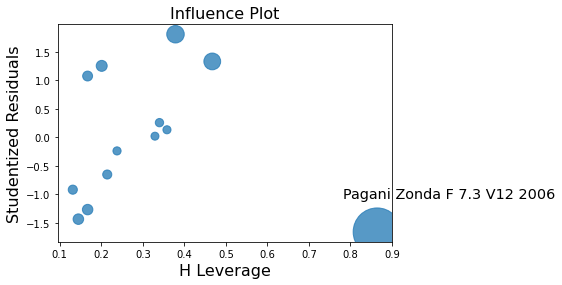

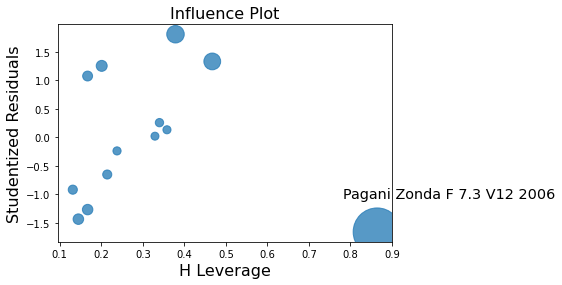

In [32]:
#Representação dos pontos influentes
sm.graphics.influence_plot(res3)

In [33]:
#limiares dos resíduos (influencias externas)
import scipy
seuil_stud = scipy.stats.t.ppf(0.975,df=na-pa-2)
print(seuil_stud)
#detection - absolute value > threshold
atyp_stud = np.abs(res_studs) > seuil_stud
#which ones?
print(dfcars.index[atyp_stud],res_studs[atyp_stud])

2.3060041350333704
Index(['FIAT Strada 1.4 2016', 'Honda Civic EXR 2016',
       'Ford Focus 2.0 GLX 2012', 'AUDI A4 3.2 V6 Fsi 2011'],
      dtype='object', name='brand_model_year') [ 7.1997264  -6.65900839 -2.62685161  3.76465014]


In [34]:
#Observações suspeitas considerando ambos critérios
pbm_infl = np.logical_or(atyp_levier,atyp_stud)
print(dfcars.index[pbm_infl])

Index(['FIAT Strada 1.4 2016', 'Honda Civic EXR 2016',
       'Ford Focus 2.0 GLX 2012', 'AUDI A4 3.2 V6 Fsi 2011'],
      dtype='object', name='brand_model_year')


In [35]:
#Outros critérios para determinar amostras influentes
print(infl.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))

                                   hat_diag  student_resid    dffits   cooks_d
brand_model_year                                                              
FIAT UNO Mille EP 1996             0.358060       0.132557  0.098999  0.002750
Hyundai HB20 Sense 2020            0.378614       1.811184  1.413775  0.398675
FIAT Strada 1.4 2016               0.200890       1.255412  0.629451  0.093093
VolksWagen GOL 1.6 2015            0.214220      -0.653374 -0.341147  0.031074
Chevrolet Cruze LTZ 1.8 2016       0.144687      -1.437841 -0.591374  0.078161
Honda Civic EXR 2016               0.167005      -1.269939 -0.568625  0.075681
Ford Focus 2.0 GLX 2012            0.131264      -0.919840 -0.357554  0.032517
BMW 325i 3.0 2012                  0.339985       0.257840  0.185056  0.009552
AUDI A4 3.2 V6 Fsi 2011            0.166945       1.076826  0.482054  0.057082
Mercedes-Benz CLS 350 3.5 V6 2012  0.237767      -0.238853 -0.133402  0.004970
Mercedes-Benz CLS 500 5.5 V8 2007  0.329143       0.

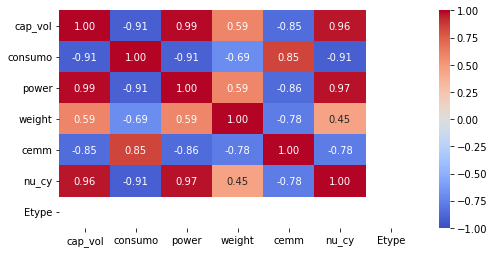

In [51]:
# Calcula a correlação entre os atributos numéricos
corr = dfcars.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [76]:
infl.exog[:,1:4]

array([[  58.,  870.,    4.],
       [  80.,  989.,    3.],
       [  86., 1084.,    4.],
       [ 104.,  961.,    4.],
       [ 144., 1427.,    4.],
       [ 155., 1294.,    4.],
       [ 148., 1347.,    4.],
       [ 218., 1460.,    6.],
       [ 269., 1610.,    6.],
       [ 306., 1735.,    6.],
       [ 388., 1760.,    8.],
       [ 461., 1709.,    8.],
       [ 602., 1230.,   12.]])

In [77]:
#correlation matrix 
import scipy 
mc = scipy.corrcoef(infl.exog[:,1:4], rowvar=0) 
print(mc)

[[1.         0.59225355 0.96890823]
 [0.59225355 1.         0.44569531]
 [0.96890823 0.44569531 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
#Klein’s rule of thumb 
mc2 = mc**2 
print(mc2)

[[1.         0.35076427 0.93878317]
 [0.35076427 1.         0.19864431]
 [0.93878317 0.19864431 1.        ]]


In [80]:
#VIF criterion 
vif = np.linalg.inv(mc) 
print(vif)

[[ 34.35864218  -6.87792632 -30.22491181]
 [ -6.87792632   2.62471127   5.49425794]
 [-30.22491181   5.49425794  27.83640092]]


## Extras

In [42]:
#ANOVA
table = sm.stats.anova_lm(res, typ=2) # 
print(table)

             sum_sq   df         F    PR(>F)
cap_vol    0.249945  1.0  0.174047  0.686315
power      0.205274  1.0  0.142941  0.714138
weight     3.079927  1.0  2.144682  0.177102
Residual  12.924689  9.0       NaN       NaN


In [43]:
#estimated coefficients 
print(res.params) 
#R2
print(res.rsquared) 
#calculating the F-statistic 
F = res.mse_model/res.mse_resid 
print(F) 
#F provided by the res object 
print(res.fvalue)

Intercept    13.897284
cap_vol      -0.000544
power        -0.006088
weight       -0.002053
dtype: float64
0.8583177713910948
18.174144629536404
18.174144629536404


### Analisando todas as variáveis do modelo final

In [81]:
dfex = dfcars.drop(columns=["Etype",       # nome
                      "cemm",       # nome
                      "cap_vol"])     # nome
dfex.head()

,consumo,power,weight,nu_cy
brand_model_year,,,,
FIAT UNO Mille EP 1996,10.4,58,870,4
Hyundai HB20 Sense 2020,12.8,80,989,3
FIAT Strada 1.4 2016,10.3,86,1084,4
VolksWagen GOL 1.6 2015,10.5,104,961,4
Chevrolet Cruze LTZ 1.8 2016,8.5,144,1427,4


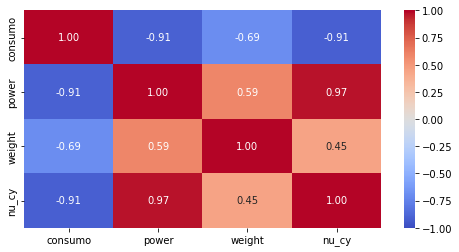

In [82]:
# Calcula a correlação entre os atributos numéricos
corr = dfex.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [89]:
print(corr)

          consumo     power    weight     nu_cy
consumo  1.000000 -0.905766 -0.687542 -0.913702
power   -0.905766  1.000000  0.592254  0.968908
weight  -0.687542  0.592254  1.000000  0.445695
nu_cy   -0.913702  0.968908  0.445695  1.000000


In [83]:
#Klein’s rule of thumb 
mc2 = corr**2 
print(mc2)

          consumo     power    weight     nu_cy
consumo  1.000000  0.820412  0.472714  0.834851
power    0.820412  1.000000  0.350764  0.938783
weight   0.472714  0.350764  1.000000  0.198644
nu_cy    0.834851  0.938783  0.198644  1.000000


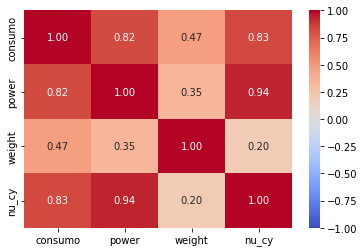

In [87]:
sns.heatmap(mc2, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

In [92]:
#VIF criterion 
vif = np.linalg.inv(mc2) 
print(vif)

[[  4.94510596   0.86342415  -1.727545    -4.59582941]
 [  0.86342415  11.18956754  -2.18959009 -10.79045883]
 [ -1.727545    -2.18959009   1.96748437   3.10696401]
 [ -4.59582941 -10.79045883   3.10696401  14.34955472]]


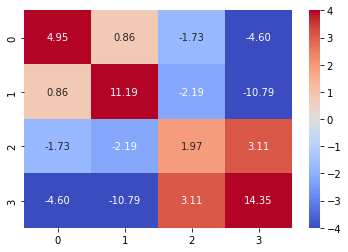

In [93]:
sns.heatmap(vif, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)

### Analisando apenas as variáveis preditoras do modelo final

In [94]:
dfex1 = dfcars.drop(columns=["Etype",       # nome
                      "cemm",       # nome
                      "consumo",       # nome
                      "cap_vol"])     # nome
dfex1.head()

,power,weight,nu_cy
brand_model_year,,,
FIAT UNO Mille EP 1996,58,870,4
Hyundai HB20 Sense 2020,80,989,3
FIAT Strada 1.4 2016,86,1084,4
VolksWagen GOL 1.6 2015,104,961,4
Chevrolet Cruze LTZ 1.8 2016,144,1427,4


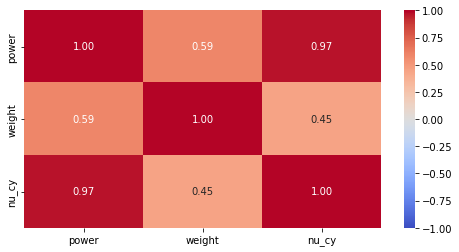

In [96]:
# Calcula a correlação entre os atributos numéricos
corr1 = dfex1.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [98]:
print(corr1)

           power    weight     nu_cy
power   1.000000  0.592254  0.968908
weight  0.592254  1.000000  0.445695
nu_cy   0.968908  0.445695  1.000000


In [99]:
#Klein’s rule of thumb 
mc21 = corr1**2 
print(mc21)

           power    weight     nu_cy
power   1.000000  0.350764  0.938783
weight  0.350764  1.000000  0.198644
nu_cy   0.938783  0.198644  1.000000


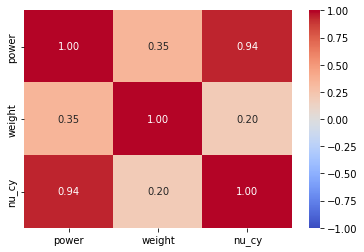

In [101]:
sns.heatmap(mc21, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

In [103]:
#VIF criterion 
vif1 = np.linalg.inv(mc21) 
print(vif1)

[[11.03881217 -1.88795771 -9.98801898]
 [-1.88795771  1.36397622  1.5014368 ]
 [-9.98801898  1.5014368  10.07833219]]


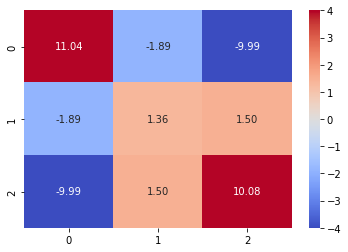

In [105]:
sns.heatmap(vif1, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)